# Depicting Deseq2 Data

### 1. Import Required Packages
### 2. Import Data
### 3. Plot Examples (Volcano Plots and Dot Plots)

## <br> 1. Import Required Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


Set figure parameters.

In [2]:
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
%config InlineBackend.figure_format='retina'
pd.options.display.max_colwidth = 200
#plt.rcParams['font.sans-serif']=['Arial']
plt.rcParams['pdf.fonttype'] = 'truetype'
plt.rcParams['font.family'] = "sans-serif"

## <br> 2. Import Deseq2 Data

In [3]:
Deseq2_Master = pd.read_csv('./Results/Deseq2_Master_Wald-EC_CELLS_ONLY.txt', delimiter = '\t', index_col=0)

In [4]:
Deseq2_Master

,Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Celltype,Time,Fold-Change
0,Gm42418,4648.083478,0.364905,0.483332,0.754978,0.450262,0.999125,LyECs,2,1.287797
1,Malat1,2629.622767,-0.212570,0.354544,-0.599557,0.548801,0.999125,LyECs,2,0.862999
2,Cmss1,774.181280,0.902527,0.577271,1.563438,0.117950,0.999125,LyECs,2,1.869337
3,Neat1,598.588051,0.155406,0.404867,0.383844,0.701094,0.999125,LyECs,2,1.113735
4,Dpyd,533.282076,-0.335522,0.366885,-0.914513,0.360447,0.999125,LyECs,2,0.792498
...,...,...,...,...,...,...,...,...,...,...
421647,Ubxn2a,1.071625,0.379140,1.356764,0.279444,0.779904,0.997212,Unknown,72,1.300566
421648,Utp11,0.892990,-3.091406,1.708405,-1.809527,0.070369,0.997212,Unknown,72,0.117326
421649,Vdac1,0.842426,1.551787,1.599392,0.970236,0.331929,0.997212,Unknown,72,2.931801
421650,Wdfy1,0.964786,0.870753,1.503533,0.579138,0.562496,0.997212,Unknown,72,1.828617


In [5]:
Deseq2_DEGs = Deseq2_Master[((Deseq2_Master['Fold-Change'] <= 1/1.5) |
                             (Deseq2_Master['Fold-Change'] >= 1.5)) &
                            (Deseq2_Master['padj'] <= 0.05)]  

In [6]:
Deseq2_Subset = Deseq2_Master[(~np.isnan(Deseq2_Master['log2FoldChange']))& 
                              (~np.isnan(Deseq2_Master['padj']))]

## 3.Volcano Plot

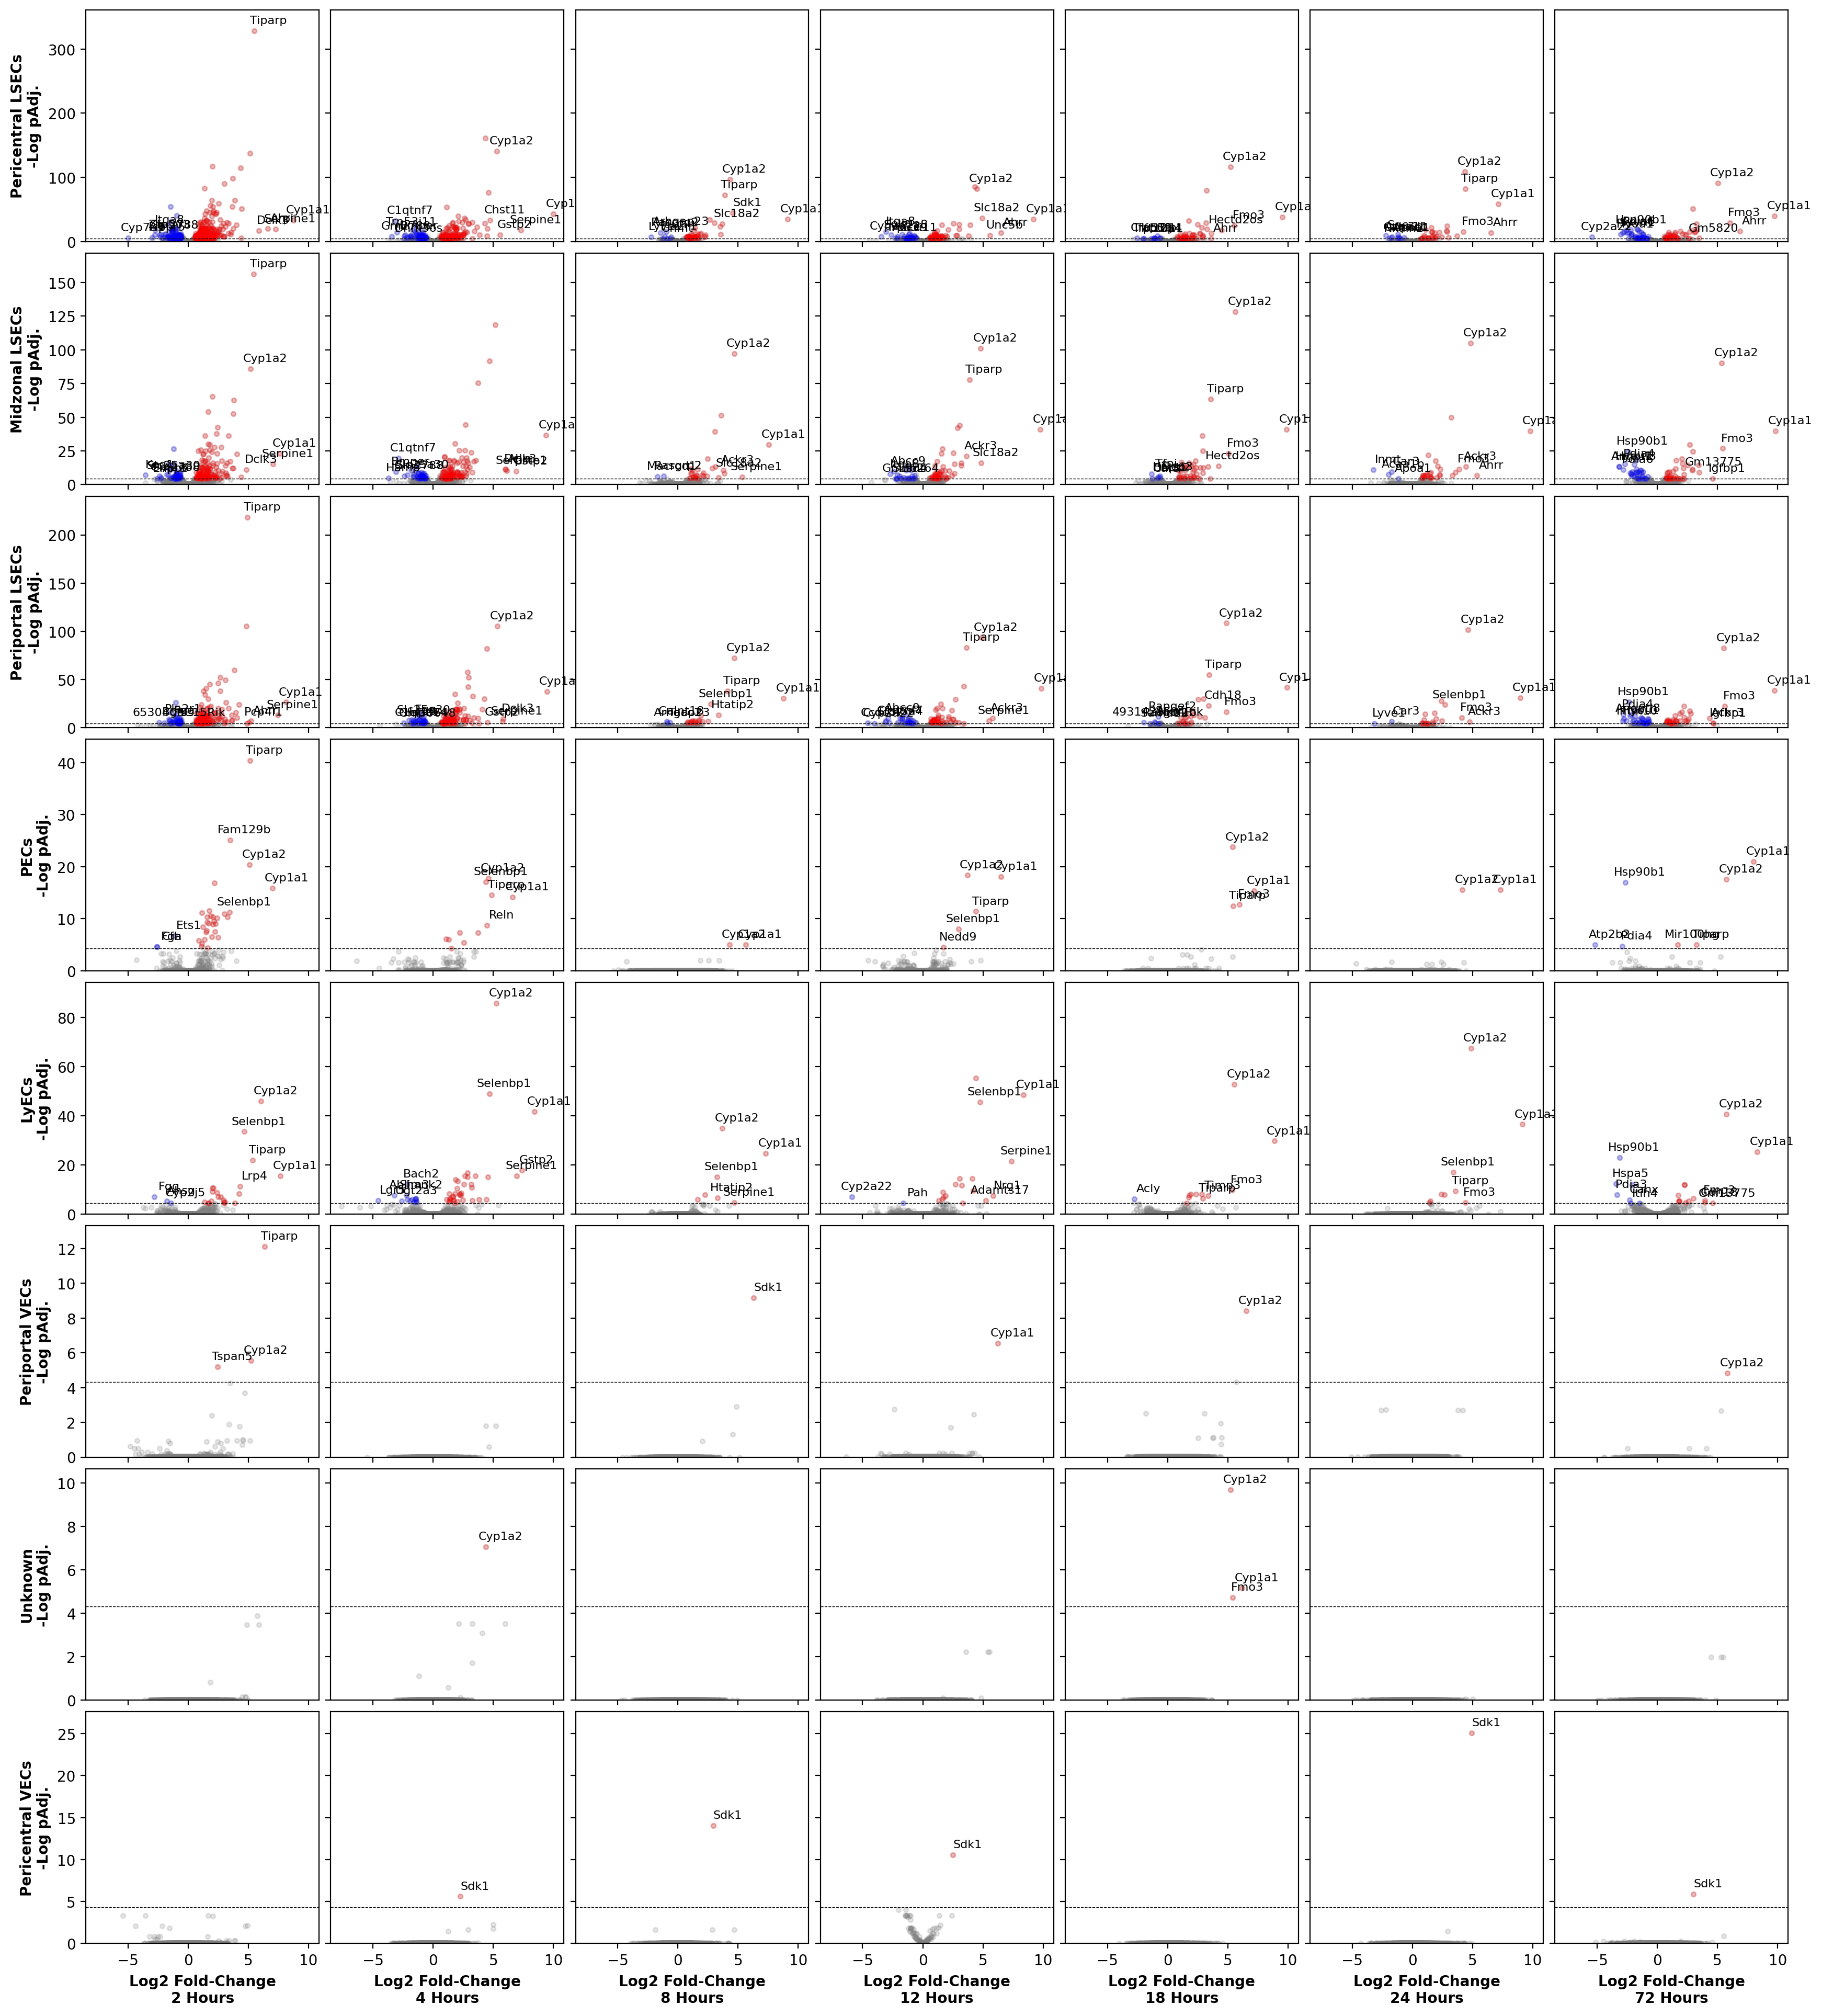

In [10]:
# Define the cell types and time points
cell_types = ['Pericentral LSECs', 'Midzonal LSECs', 'Periportal LSECs', 'PECs', 'LyECs', 'Periportal VECs', 'Unknown', 'Pericentral VECs']
time_points = [2, 4, 8, 12, 18, 24, 72]

# Set threshold values for fold-change and adjusted p-value
fold_change_threshold = 0.58496250072  # this is Log2(1.5)
padj_threshold = 0.05
label_top_f = 5  # Number of top values to label
label_bottom_f = 5  # Number of bottom values to label

# Set the figure size
fig, axes = plt.subplots(len(cell_types), len(time_points), figsize=(3 * len(time_points), 3 * len(cell_types)), sharex=True, sharey='row')

# Dictionary to store the maximum y-axis value for each cell type
y_max_dict = {}

# Iterate over each cell type
for j, cell_type in enumerate(cell_types):
    # Filter the data for the current cell type
    cell_type_data = Deseq2_Subset[Deseq2_Subset['Celltype'] == cell_type]

    # Calculate the maximum -log2(padj) value for the current cell type
    y_max = cell_type_data['padj'].apply(lambda x: -np.log2(x)).max() * 1.1

    # Store the maximum y-axis value in the dictionary
    y_max_dict[cell_type] = y_max

    # Iterate over each time point
    for i, time_point in enumerate(time_points):
        # Filter the data for the current cell type and time point
        Volcano_cell_time_point = cell_type_data[cell_type_data['Time'] == time_point]

        # Create the volcano plot with smaller point size (s=10)
        scatter_plot = axes[j, i].scatter(
            Volcano_cell_time_point['log2FoldChange'],
            -np.log2(Volcano_cell_time_point['padj']),
            color='gray', alpha=.2, s=10, rasterized=True)

        # Filter the points based on fold-change and adjusted p-value thresholds
        upregulated_points = Volcano_cell_time_point[
            (Volcano_cell_time_point['log2FoldChange'] > fold_change_threshold) &
            (Volcano_cell_time_point['padj'] < padj_threshold)
        ]
        downregulated_points = Volcano_cell_time_point[
            (Volcano_cell_time_point['log2FoldChange'] < -fold_change_threshold) &
            (Volcano_cell_time_point['padj'] < padj_threshold)
        ]

        # Plot the upregulated points as red and move the legend to the top left corner
        axes[j, i].scatter(
            upregulated_points['log2FoldChange'],
            -np.log2(upregulated_points['padj']),
            color='red', label='Upregulated', alpha=.2, s=10, rasterized=True)

        # Plot the downregulated points as blue and move the legend to the top left corner
        axes[j, i].scatter(
            downregulated_points['log2FoldChange'],
            -np.log2(downregulated_points['padj']),
            color='blue', label='Downregulated', alpha=.2, s=10, rasterized=True)

        # Add horizontal line for the significance threshold
        axes[j, i].axhline(-np.log2(padj_threshold), color='black', linestyle='--', linewidth=0.5)

        # Remove x-axis and y-axis titles
        axes[j, i].set_xlabel('')
        axes[j, i].set_ylabel('')

        # Set the y-axis range for the current subplot using the dictionary
        axes[j, i].set_ylim(0, y_max_dict[cell_type])

        # Label the top f log2FoldChange values
        top_f_indices = upregulated_points['log2FoldChange'].nlargest(label_top_f).index
        top_f_values = upregulated_points.loc[top_f_indices, 'log2FoldChange']
        top_f_genes = upregulated_points.loc[top_f_indices, 'Gene']
        top_f_padj_values = upregulated_points.loc[top_f_indices, 'padj']

        for k, (x, y, gene, padj) in enumerate(
                zip(top_f_values, -np.log2(top_f_padj_values), top_f_genes, top_f_padj_values)):
            axes[j, i].annotate(f'{gene}',
                                xy=(x, y), xycoords='data', xytext=(10, 5),
                                textcoords='offset points', ha='center', fontsize=8)

        # Label the bottom f log2FoldChange values (if there are negative values)
        if downregulated_points['log2FoldChange'].min() < 0:
            bottom_f_indices = downregulated_points['log2FoldChange'].nsmallest(label_bottom_f).index
            bottom_f_values = downregulated_points.loc[bottom_f_indices, 'log2FoldChange']
            bottom_f_genes = downregulated_points.loc[bottom_f_indices, 'Gene']
            bottom_f_padj_values = downregulated_points.loc[bottom_f_indices, 'padj']

            for k, (x, y, gene, padj) in enumerate(
                    zip(bottom_f_values, -np.log2(bottom_f_padj_values), bottom_f_genes, bottom_f_padj_values)):
                axes[j, i].annotate(f'{gene}',
                                    xy=(x, y), xycoords='data', xytext=(10, 5),
                                    textcoords='offset points', ha='center', fontsize=8)

    # Set the y-axis label for the current cell type with the cell type name bolded
    axes[j, 0].set_ylabel(f'{cell_type}\n-Log pAdj.', fontweight='bold')

# Add x-axis labels with line breaks for each time point
for i, time_point in enumerate(time_points):
    axes[-1, i].set_xlabel(f'Log2 Fold-Change\n{time_point} Hours', fontweight='bold')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)

# Save the plot as a PDF file
plt.savefig('./Figures/Volcano_DEGs.pdf', dpi=300, bbox_inches='tight', pad_inches=0)

# Show the volcano plots
plt.show()


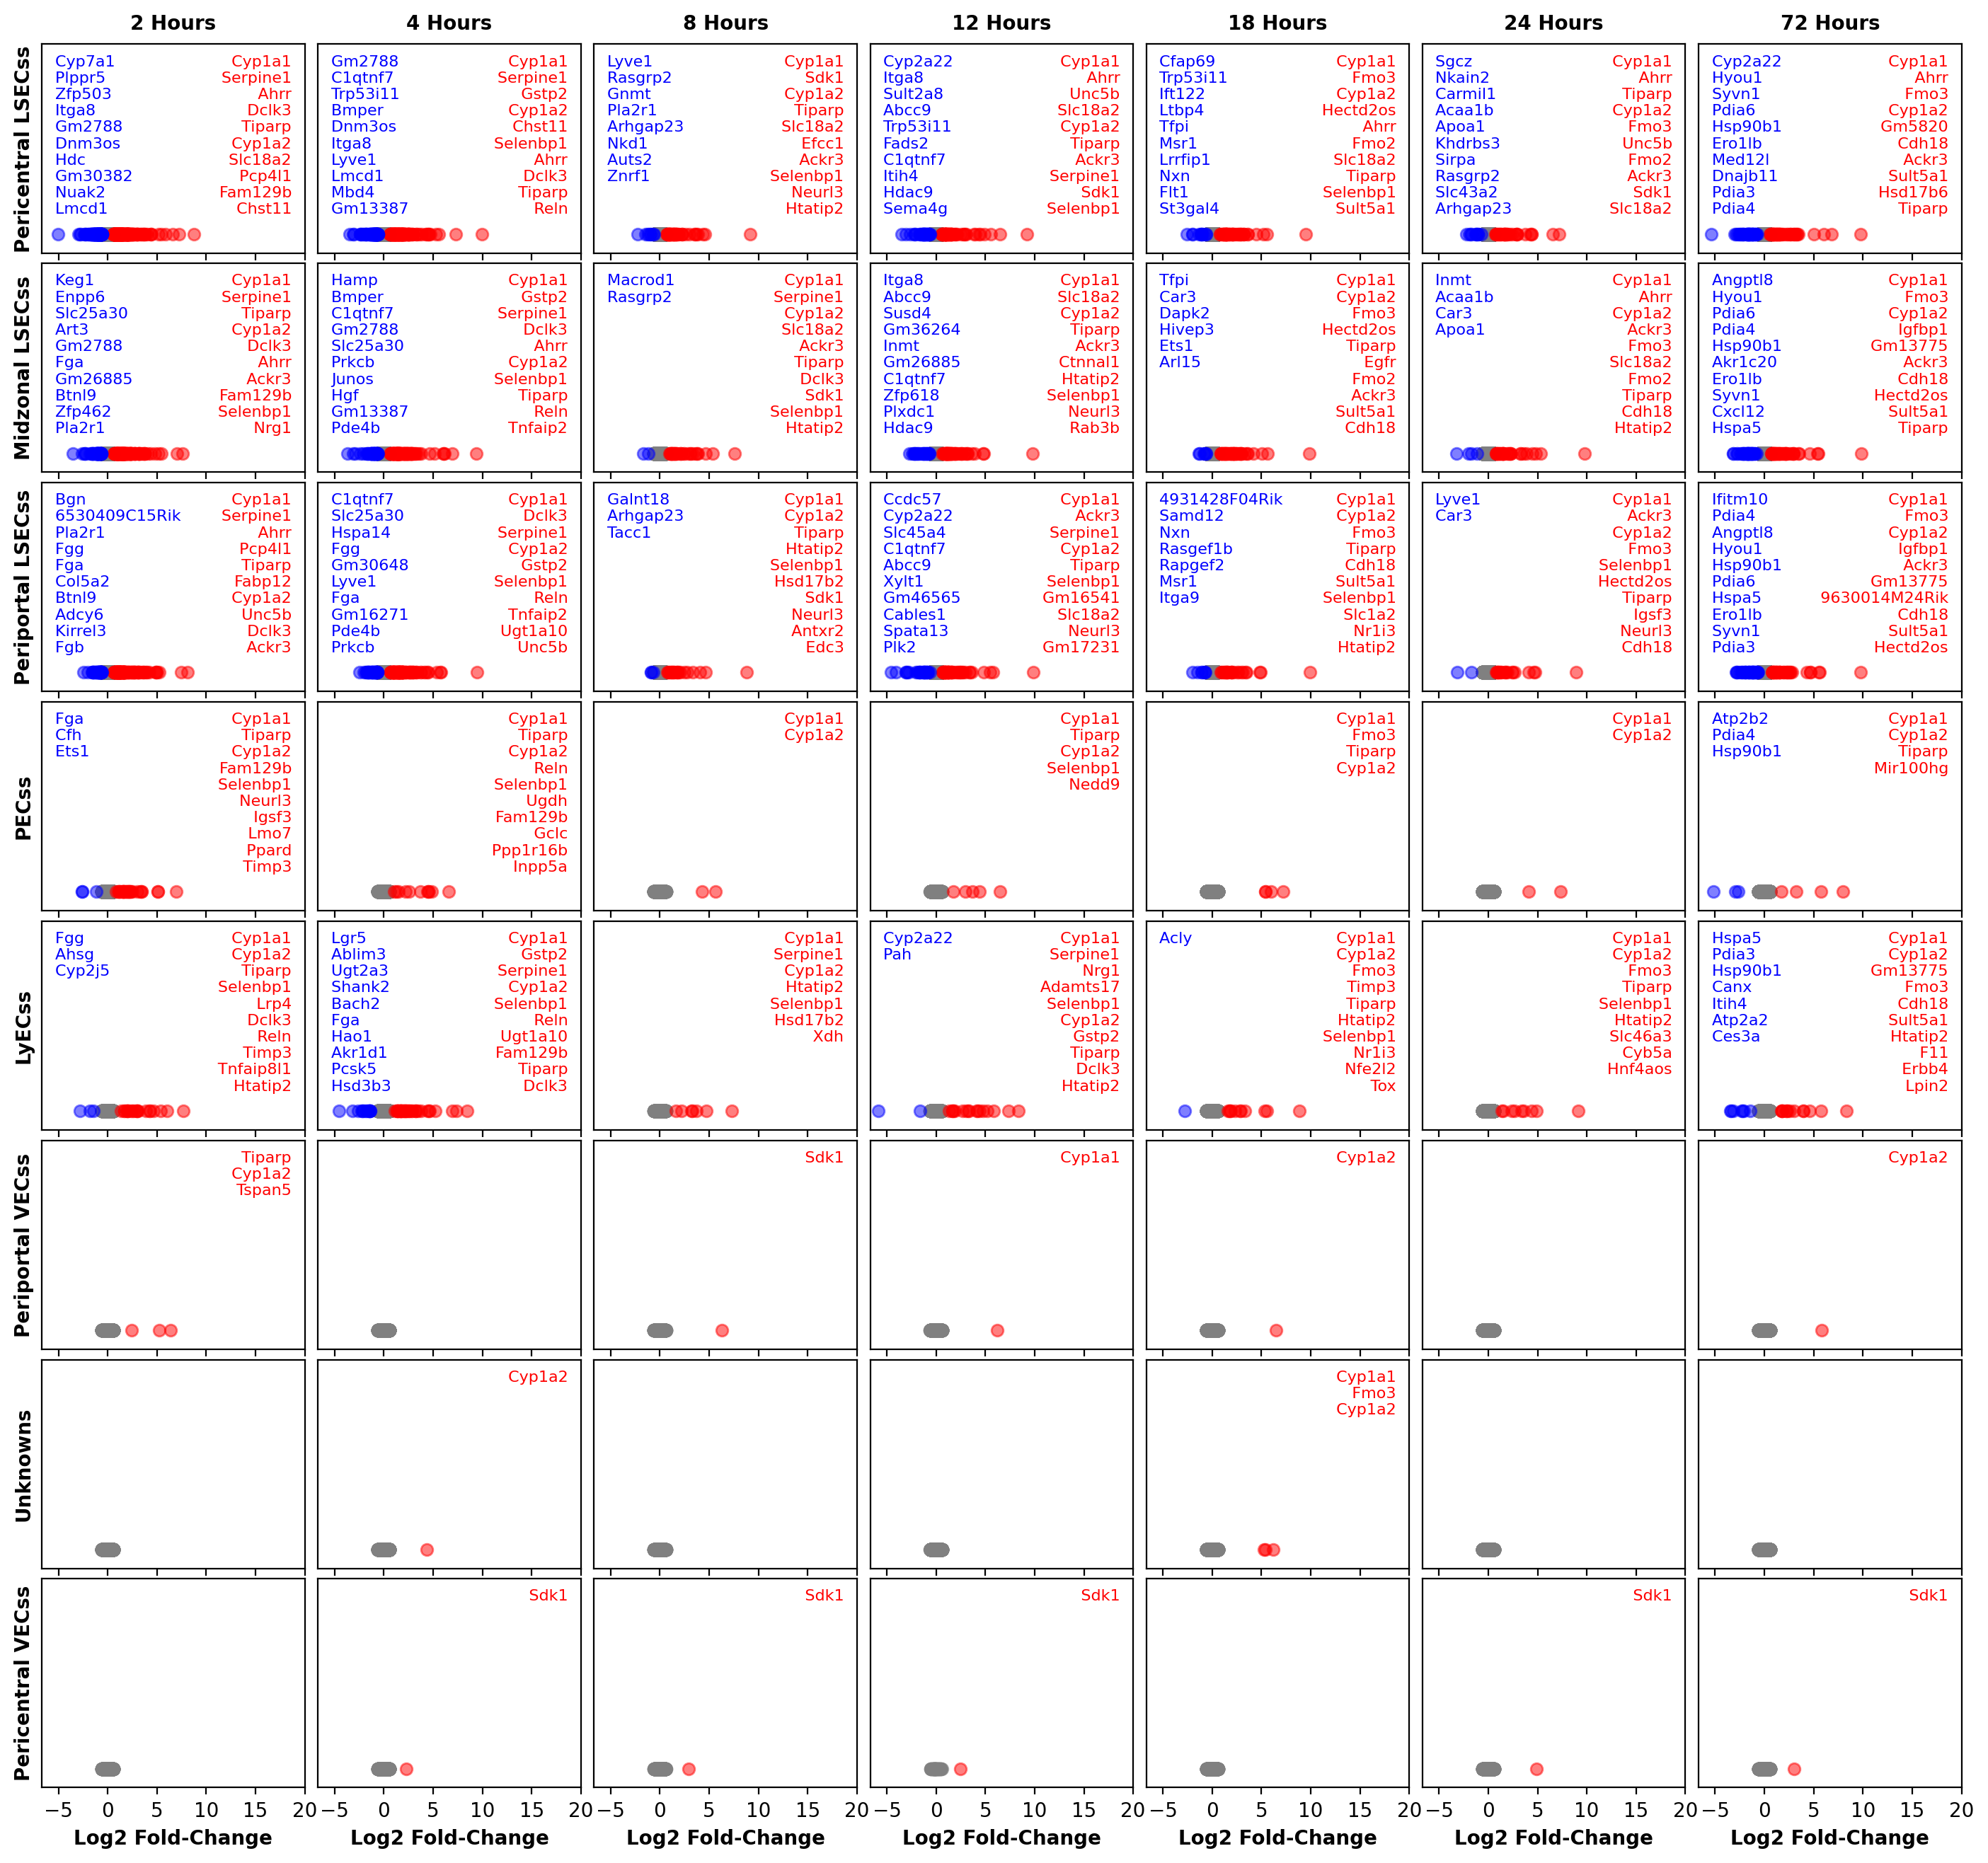

In [11]:
# Define the cell types and time points
cell_types = ['Pericentral LSECs', 'Midzonal LSECs', 'Periportal LSECs', 'PECs', 'LyECs', 'Periportal VECs', 'Unknown', 'Pericentral VECs']
time_points = [2, 4, 8, 12, 18, 24, 72]

# Set threshold values for fold-change and adjusted p-value
fold_change_threshold = 0.58496250072  # this is Log2(1.5)
padj_threshold = 0.05
label_top_f = 5  # Number of top values to label
label_bottom_f = 5  # Number of bottom values to label

# Set the figure size
fig, axes = plt.subplots(len(cell_types), len(time_points), figsize=(2.5 * len(time_points), 2 * len(cell_types)), sharex=True, sharey='row')

# Iterate over each cell type
for j, cell_type in enumerate(cell_types):
    # Filter the data for the current cell type
    cell_type_data = Deseq2_Subset[Deseq2_Subset['Celltype'] == cell_type]

    # Iterate over each time point
    for i, time_point in enumerate(time_points):
        # Filter the data for the current cell type and time point
        time_point_data = cell_type_data[cell_type_data['Time'] == time_point]

        # Filter the data based on your criteria
        upregulated_points = time_point_data[
            (time_point_data['log2FoldChange'] > fold_change_threshold) &
            (time_point_data['padj'] < padj_threshold)
        ]
        downregulated_points = time_point_data[
            (time_point_data['log2FoldChange'] < -fold_change_threshold) &
            (time_point_data['padj'] < padj_threshold)
        ]
        gray_points = time_point_data[
            (time_point_data['log2FoldChange'] <= fold_change_threshold) &
            (time_point_data['log2FoldChange'] >= -fold_change_threshold) &
            (time_point_data['padj'] >= padj_threshold)
        ]

        # Create a scatter plot with only one axis
        axes[j, i].scatter(gray_points['log2FoldChange'], np.zeros(len(gray_points)), color='gray', alpha=0.5, label='Other', rasterized=True)
        axes[j, i].scatter(upregulated_points['log2FoldChange'], np.zeros(len(upregulated_points)), color='red', alpha=0.5, label='Upregulated', rasterized=True)
        axes[j, i].scatter(downregulated_points['log2FoldChange'], np.zeros(len(downregulated_points)), color='blue', alpha=0.5, label='Downregulated', rasterized=True) 

        # Set the y-axis limits
        axes[j, i].set_ylim(-0.01, 0.1)

        # Remove x-axis and y-axis titles
        axes[j, i].set_xlabel('')
        axes[j, i].set_ylabel('')
        
        # Remove y-axis ticks and labels
        for ax in axes.flat:
            ax.set_yticks([])
            ax.set_xticks([-5,0,5,10, 15, 20])

        # Set the x-axis label for the bottom plot in each column
        if j == len(cell_types) - 1:
            axes[j, i].set_xlabel(f'Log2 Fold-Change', fontweight='bold')

        # Set the y-axis label for the leftmost plot in each row
        if i == 0:
            axes[j, i].set_ylabel(f'{cell_type}s', fontweight='bold')

        # Add the time point label to the top of each column
        if j == 0:
            axes[j, i].text(0.5, 1.05, f'{time_point} Hours', fontsize=10, fontweight='bold', ha='center', va='bottom', transform=axes[j, i].transAxes)

        # Get the top 10 upregulated and downregulated genes
        top_up_genes = upregulated_points.nlargest(10, 'log2FoldChange')['Gene']
        top_down_genes = downregulated_points.nsmallest(10, 'log2FoldChange')['Gene']

        # Create separate lists for upregulated and downregulated genes
        up_gene_list = '\n'.join([f'{up_gene:>15}' for up_gene in top_up_genes])
        down_gene_list = '\n'.join([f'{down_gene:<15}' for down_gene in top_down_genes])

        # Add the gene lists as text overlay
        axes[j, i].text(0.05, 0.95, down_gene_list, fontsize=8, color='blue', va='top', ha='left', transform=axes[j, i].transAxes)
        axes[j, i].text(0.95, 0.95, up_gene_list, fontsize=8, color='red', va='top', ha='right', transform=axes[j, i].transAxes)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)

# Save the plot as a PDF file
plt.savefig('./Figures/Line_DotPlot_DEGs.pdf', dpi=300, bbox_inches='tight')

# Show the plots
plt.show()
